In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

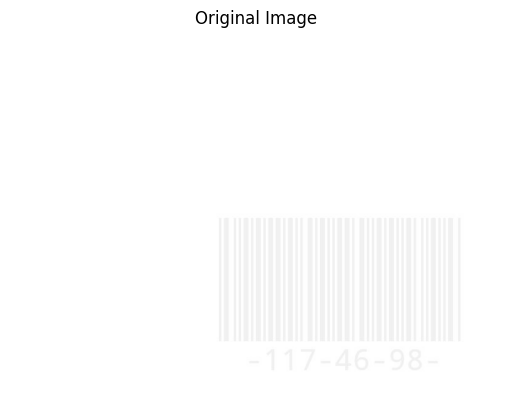

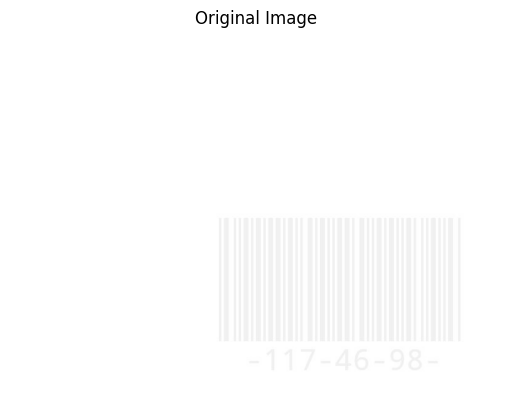

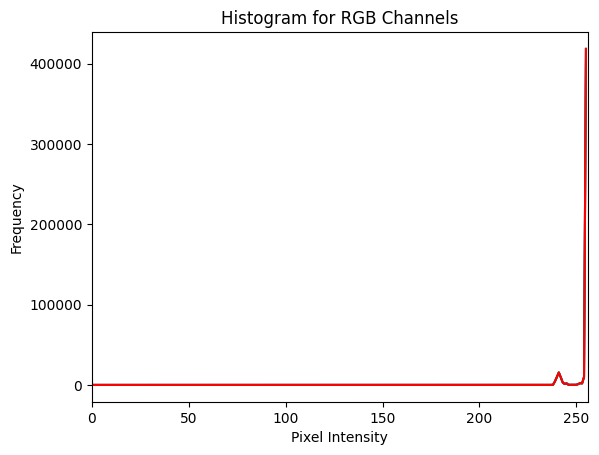

In [21]:
img2 = cv.imread('/content/6test.jpg', cv.IMREAD_UNCHANGED)
display_image(img2, 'Original Image')
#Plot the histogram of the image
# Calculate the histogram
import cv2 as cv
import matplotlib.pyplot as plt

# Read the image with IMREAD_UNCHANGED (keeping the alpha channel if present)
img2 = cv.imread('/content/6test.jpg', cv.IMREAD_UNCHANGED)

# Display the original image
display_image(img2, 'Original Image')

# Check if the image has an alpha channel (4 channels) or just RGB (3 channels)
if len(img2.shape) == 3 and img2.shape[2] == 4:  # RGBA (with alpha channel)
    # Split the channels (BGR and alpha)
    channels = cv.split(img2)
    colors = ['b', 'g', 'r', 'a']  # Blue, Green, Red, Alpha

    # Plot the histogram for each channel
    plt.figure()
    plt.title("Histogram for RGBA Channels")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")

    for channel, color in zip(channels, colors):
        hist = cv.calcHist([channel], [0], None, [256], [0, 256])
        plt.plot(hist, color=color)
else:
    # If it's a grayscale or RGB image, compute the histogram
    if len(img2.shape) == 2:  # Grayscale image
        hist = cv.calcHist([img2], [0], None, [256], [0, 256])
        plt.figure()
        plt.title("Grayscale Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.plot(hist, color='black')
    else:
        # RGB image (3 channels)
        channels = cv.split(img2)
        colors = ['b', 'g', 'r']  # Blue, Green, Red

        # Plot the histogram for each channel
        plt.figure()
        plt.title("Histogram for RGB Channels")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")

        for channel, color in zip(channels, colors):
            hist = cv.calcHist([channel], [0], None, [256], [0, 256])
            plt.plot(hist, color=color)

plt.xlim([0, 256])
plt.show()


In [2]:
def crop_barcode(img):
    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Find the horizontal limits of the barcode
    x_min = min([cv.boundingRect(contour)[0] for contour in contours])  # Leftmost x-coordinate
    x_max = max([cv.boundingRect(contour)[0] + cv.boundingRect(contour)[2] for contour in contours])  # Rightmost x-coordinate

    # Assume the largest contour corresponds to the vertical extent of the barcode
    largest_contour = max(contours, key=cv.contourArea)
    _, y, _, h = cv.boundingRect(largest_contour)  # Get the y and height (vertical cropping)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def crop_barcode2(img):

    # Find contours in the binary image
    contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Assume the largest contour probably corresponds to a wide bar in the barcode
    largest_contour = max(contours, key=cv.contourArea)
    largest_contour_area = cv.contourArea(largest_contour)

    # Find the horizontal limits of the barcode
    x_min = None
    x_max = None
    for contour in contours:
        contour_area = cv.contourArea(contour)
        if contour_area >= 0.2 * largest_contour_area:  # Check if the contour area is at least 20% of the largest contour
            x, _, w, _ = cv.boundingRect(contour)
            if x_min is None or x < x_min:
                x_min = x
            if x_max is None or x + w > x_max:
                x_max = x + w

    # If no valid contours are found, use the entire width of the image
    if x_min is None or x_max is None:
        x_min = 0
        x_max = img.shape[1]

    # Get the vertical limits from the largest contour
    _, y, _, h = cv.boundingRect(largest_contour)

    # Crop the image so that only the barcode is visible
    cropped_img = img[y:y + h, x_min:x_max]

    # Draw the bounding rectangle of the largest contour in green
    cv.rectangle(img, (x_min, y), (x_max, y + h), (0, 255, 0), 2)

    # Draw all contours in red
    contour_img = cv.cvtColor(img, cv.COLOR_GRAY2BGR)  # Convert to BGR for colored drawing
    cv.drawContours(contour_img, contours, -1, (0, 0, 255), 2)  # Draw all contours in red

    return cropped_img, contour_img

def display_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

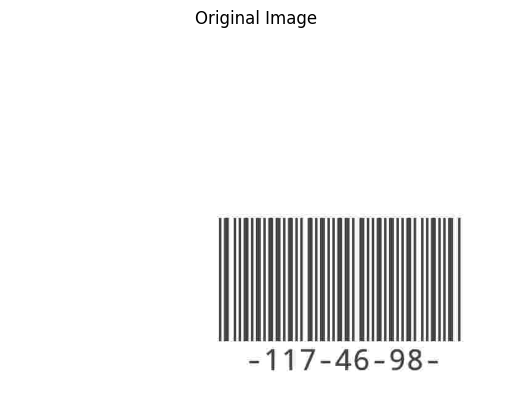

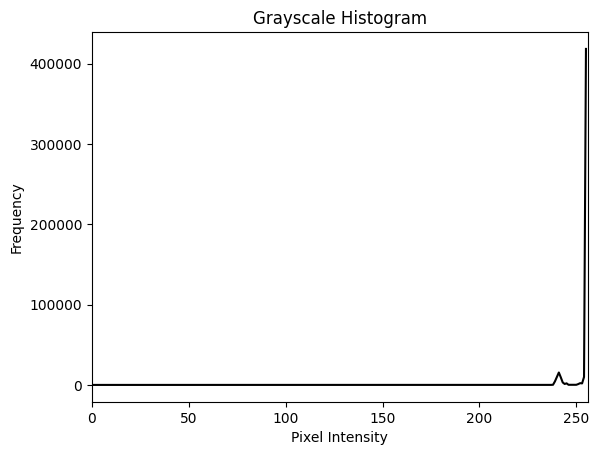

Average pixel value: 253.61312291666667


In [22]:
# Read the image
# img = cv.imread('Samples/image1.jpg', cv.IMREAD_GRAYSCALE)
#img = cv.imread('Samples/Test Cases/01 - lol easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/02 - still easy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/03 - eda ya3am ew3a soba3ak mathazarsh.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/04 - fen el nadara.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/05 - meen taffa el nour!!!.jpg', cv.IMREAD_GRAYSCALE)
img = cv.imread('/content/06 - meen fata7 el nour 333eenaaayy.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/07 - mal7 w felfel.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/08 - compresso espresso.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/09 - e3del el sora ya3ammm.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/10 - wen el kontraastttt.jpg', cv.IMREAD_GRAYSCALE)
# img = cv.imread('Samples/Test Cases/11 - bayza 5ales di bsara7a.jpg', cv.IMREAD_GRAYSCALE)

# Display the image (Use plt.imshow() for display)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')  # Hide the axis
plt.show()

    # Plot the histogram of the grayscale image
hist = cv.calcHist([img], [0], None, [256], [0, 256])

    # Plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.show()
# define the alpha and beta
alpha = 10 # Contrast control
beta = 100 # Brightness control


average_pixel_value = np.average(img)
print(f'Average pixel value: {average_pixel_value}')

#Display the image after enhancing the contrast
#display_image(img, 'Enhanced Image')

#plt.hist(img.ravel(), 256, [0, 256])
#plt.title('Histogram of the Enhanced Image')
#plt.show()

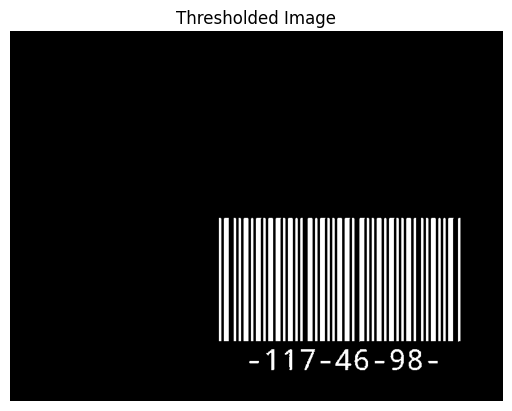

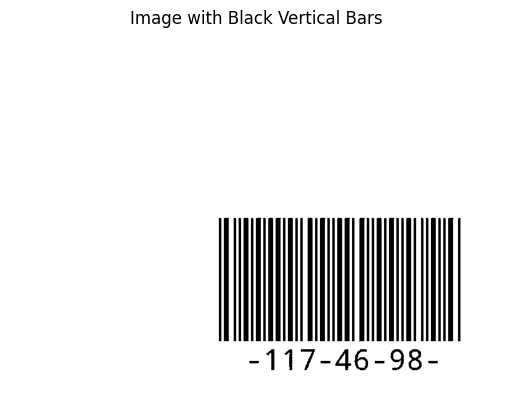

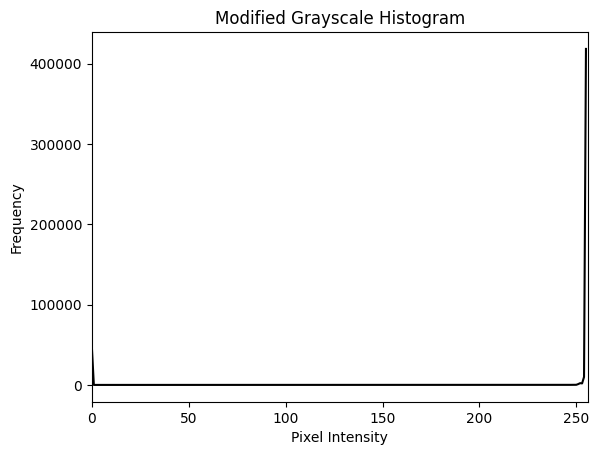

In [31]:
# Apply binary threshold to detect dark regions (black bars of the barcode)
# You can adjust the threshold value based on your image
_, thresh = cv.threshold(img, 200, 255, cv.THRESH_BINARY_INV)

# Display the thresholded image (shows only black bars)
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

# Set the detected bars to black (set pixels to 0 in the thresholded regions)
img[thresh == 255] = 0

# Display the modified image with black bars
plt.imshow(img, cmap='gray')
plt.title('Image with Black Vertical Bars')
plt.axis('off')
plt.show()

# Plot the histogram of the modified image
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title("Modified Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.show()

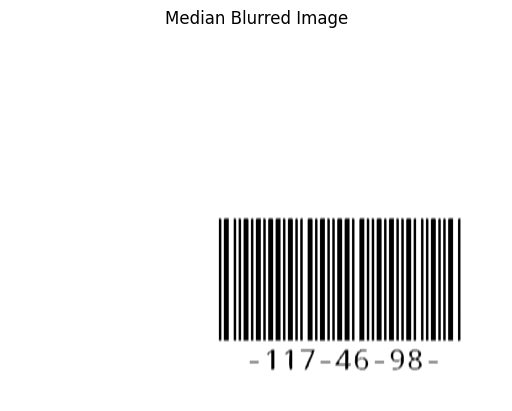

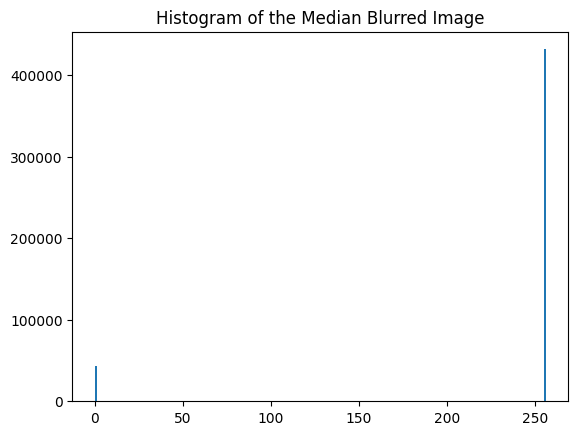

In [32]:
 # Apply Median Filter vertically only
kernel = np.ones((7,1),np.float32)/5
median_blurred_img = cv.filter2D(img,-1,kernel)

# Display the image
display_image(median_blurred_img, 'Median Blurred Image')

plt.hist(median_blurred_img.ravel(), 256, [0, 256])
plt.title('Histogram of the Median Blurred Image')
plt.show()

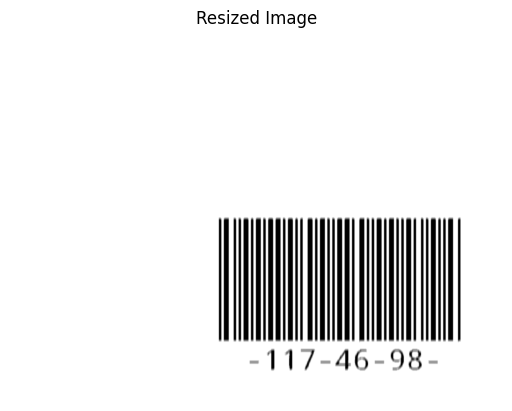

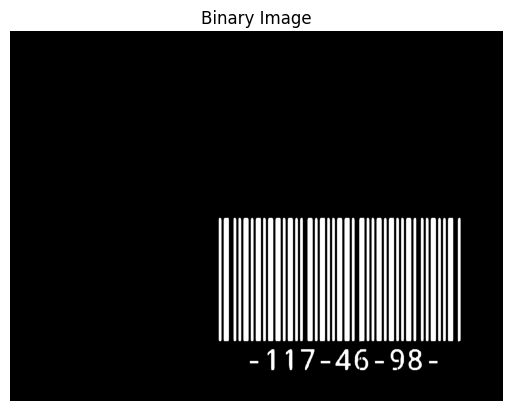

In [33]:
# Resize the image to increase its dimensions
scale_factor = 4  # Adjust the scale factor as needed
resized_img = cv.resize(median_blurred_img, (median_blurred_img.shape[1] * scale_factor, median_blurred_img.shape[0] * scale_factor))
display_image(resized_img, 'Resized Image')
# Binarize the image using a threshold
_, binary_img = cv.threshold(resized_img, 180, 255, cv.THRESH_BINARY_INV)

# Display the image
display_image(binary_img, 'Binary Image')

In [34]:
kernel_height1 = 15
kernel_width1 = 15
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1



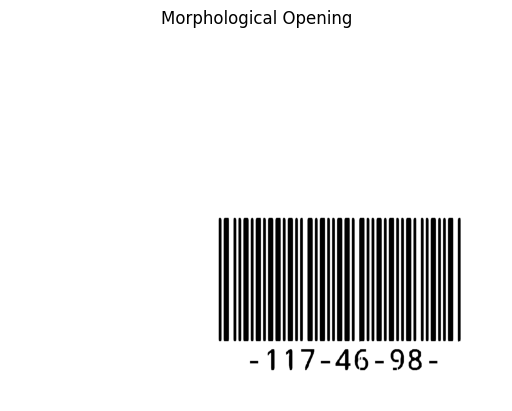

In [35]:
opened_img = cv.morphologyEx(binary_img, cv.MORPH_OPEN, kernel1)
display_image(cv.bitwise_not(opened_img), 'Morphological Opening')

In [38]:
kernel_height1 = 17
kernel_width1 = 17
kernel1 = np.zeros((kernel_height1, kernel_width1), np.uint8)
kernel1[:, kernel_width1 // 2] = 1

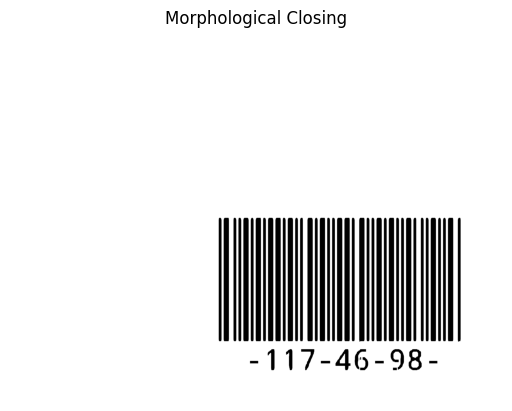

In [39]:
closed_img = cv.morphologyEx(opened_img, cv.MORPH_CLOSE, kernel1)
display_image(cv.bitwise_not(closed_img), 'Morphological Closing')

In [36]:
kernel_height2 = 1
kernel_width2 = 5
kernel2 = np.ones((kernel_height2, kernel_width2), np.uint8)

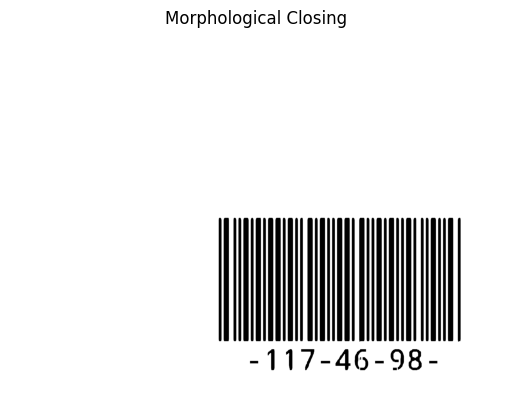

In [40]:
closed_again = cv.morphologyEx(closed_img, cv.MORPH_CLOSE, kernel2)
display_image(cv.bitwise_not(closed_again), 'Morphological Closing')

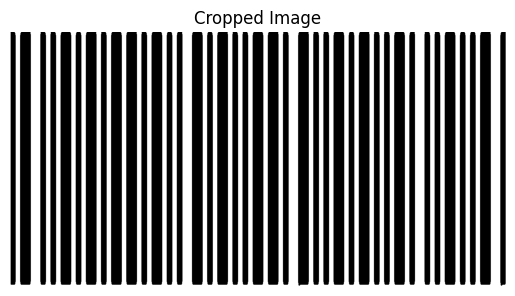

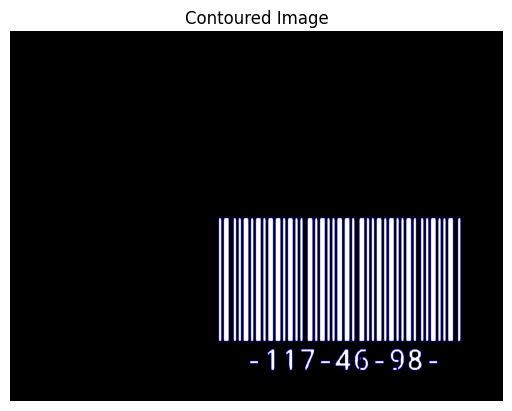

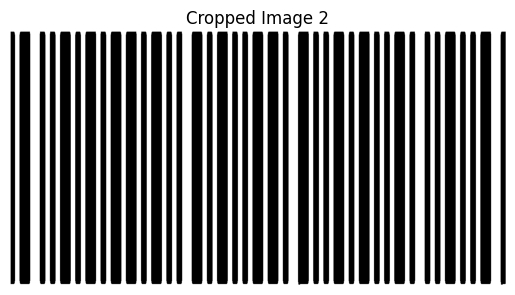

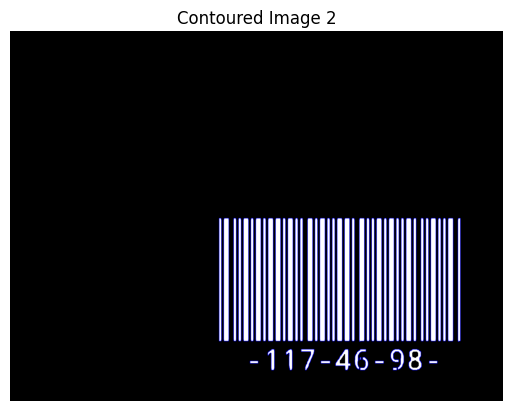

In [41]:
cropped_img, contoured_img = crop_barcode(closed_again)
display_image(cv.bitwise_not(cropped_img), 'Cropped Image')
display_image(contoured_img, 'Contoured Image')
cropped_img2, contoured_img2 = crop_barcode2(closed_again)
display_image(cv.bitwise_not(cropped_img2), 'Cropped Image 2')
display_image(contoured_img2, 'Contoured Image 2')

In [42]:
# Create a vertical kernel (all 1's vertically)
kernel_vertical = np.ones((17, 1), np.uint8)  # Adjust the height as needed

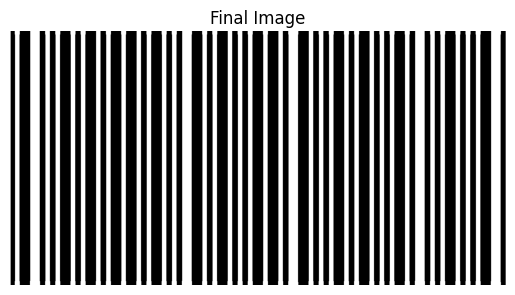

In [43]:
# Apply dilation with the vertical kernel
dilated_img = cv.dilate(cropped_img2, kernel_vertical)
final_img = cv.morphologyEx(cropped_img2, cv.MORPH_CLOSE, kernel1)
display_image(cv.bitwise_not(final_img), 'Final Image')